In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('purchase.csv')
print(df.shape)
df.head()
# Y: Purchased - 1 (구매), 0 (구매 x)
# X: 성별, 나이, 수익(연봉)

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
# 구매 여부에 따른 남녀 수
cond1 = df["Purchased"] == 1 # 구매한 사람
cond2 = df['Gender'] == 'Male' # 남자



print(f'구매한 남성: {len(df[cond1 & cond2])}, 여성: {len(df[cond1 & ~cond2])}')
print(f'구매한지 않은 남성: {len(df[~cond1 & cond2])}, 여성: {len(df[~cond1 & ~cond2])}')

구매한 남성: 66, 여성: 77
구매한지 않은 남성: 130, 여성: 127


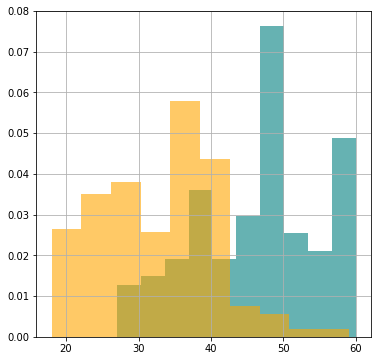

In [41]:
# 구매 여부에 따른 나이 분포
fig, ax = plt.subplots(1, 1, figsize=(6, 6))



df[cond1]['Age'].hist(density=True, color='teal', alpha=0.6, ax = ax)
df[~cond1]['Age'].hist(density=True, color='orange', alpha=0.6, ax = ax)
plt.show()

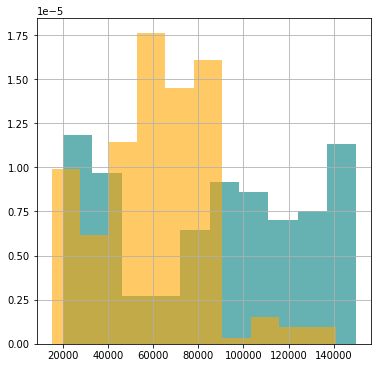

In [42]:
# 구매 여부에 따른 연봉 차이
fig, ax = plt.subplots(1, 1, figsize=(6, 6))



df[cond1]['EstimatedSalary'].hist(density=True, color='teal', alpha=0.6, ax = ax)
df[~cond1]['EstimatedSalary'].hist(density=True, color='orange', alpha=0.6, ax = ax)
plt.show()

In [31]:
#sklearn을 사용해 logistic regression 구현

In [32]:
from sklearn.linear_model import LogisticRegression

In [129]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [130]:
Xs = df[['Gender', 'Age', 'EstimatedSalary']]
Y = df['Purchased']



logit_reg = LogisticRegression().fit(Xs, Y)

In [131]:
print(logit_reg.coef_)
print(logit_reg.intercept_)
print(logit_reg.classes_)

[[-1.31721757e-10 -2.10415187e-09 -2.69301405e-06]]
[-2.2494472e-10]
[0 1]


In [132]:
sum(logit_reg.predict(Xs)  == Y)/len(Y) #accuracy 정확도 확인

0.6425

In [46]:
#독립변수 간 스케일 차이로 학습 실패
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # (X-mean)/std Z스코어??
Xs = sc.fit_transform(Xs)
Xs

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [47]:
logit_reg.fit(Xs, Y)

LogisticRegression()

In [54]:
pd.DataFrame({'coef': logit_reg.coef_[0]},
index = ['gender', 'age', 'salary'])

,coef
gender,0.146125
age,2.292050
salary,1.147433


In [48]:
sum(logit_reg.predict(Xs) == Y)/len(Y)

0.8525

In [ ]:
#sklearn 모델의 logistic regreesion 에서 predict 사용시 반환하는 값

In [ ]:
#predict(데이터셋)
#predict_log_proba(데이터셋) #~inf +inf
#predict_proba(데이터셋) #p

In [51]:
logit_reg.predict_log_proba(Xs)[0]

array([-1.17783618e-03, -6.74466513e+00])

In [50]:
pred_logOdds = pd.DataFrame(logit_reg.predict_log_proba(Xs), columns = logit_reg.classes_)
pred_logOdds.describe()

,0,1
count,400.000000,400.000000
mean,-0.832526,-1.931392
std,1.240442,1.765161
min,-6.193475,-6.969347
25%,-0.881405,-3.008570
50%,-0.317757,-1.301547
75%,-0.050624,-0.534777
max,-0.000941,-0.002045


In [52]:
pred_p = pd.DataFrame(logit_reg.predict_proba(Xs), columns=logit_reg.classes_)
pred_p.describe()

,0,1
count,400.000000,400.000000
mean,0.642500,0.357500
std,0.337467,0.337467
min,0.002043,0.000940
25%,0.414200,0.049364
50%,0.727809,0.272191
75%,0.950636,0.585800
max,0.999060,0.997957


In [ ]:
#statsmodels 패키지를 사용해 모델을 구성하는 변수의 codf평가

In [56]:
import statsmodels.api as sm

In [58]:
Xs = pd.DataFrame(Xs, columns= ['gender', 'age', 'salary'])

In [60]:
logit_reg_sm = sm.GLM(Y, Xs, family=sm.families.Binomial())#logistic regression 모델을 나타내는 parameter
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -166.71
Date:                Tue, 10 May 2022   Deviance:                       333.42
Time:                        11:10:54   Pearson chi2:                     605.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gender         0.0746      0.136      0.549      0.5

In [63]:
#confusion matrix 연산

In [64]:
conda install -c conda-forge dmba

Solving environment: done

## Package Plan ##

  environment location: /Users/jaunnnngspc/opt/anaconda3/envs/fakepython

  added / updated specs:
    - dmba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    dmba-0.1.0                 |     pyhd8ed1ab_0        11.3 MB  conda-forge
    freetype-2.10.4            |       h4cff582_1         890 KB  conda-forge
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    jpeg-9e                    |       h5eb16cf_1         259 KB  conda-forge
    kiwisolver-1.3.2           |   py39he9d5cce_0          53 KB
    lcms2-2.12                 |       h577c468_0         404 KB  conda-forge
    libpng-1.6.37              |       h7cec526_2         313 KB  conda-forge
    libwebp-base-1.2.2         |       h0d85af4_1         703 KB  conda-forge
    lz4-

In [65]:
#coding
true_y = Y ==1
pred_y = logit_reg.predict(Xs) ==1

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [67]:
tp = sum(true_y & pred_y)
fn = sum(true_y & ~pred_y)
fp = sum(~true_y & pred_y)
tn = sum(~true_y & ~pred_y)
conf_mat = [[tp, fn], [fp, tn]]
pd.DataFrame(conf_mat,
index = ['true 구매', 'true 구매 x'],
columns = ['model 구매', 'model 구매 x'])

,model 구매,model 구매 x
true 구매,104,39
true 구매 x,20,237


In [68]:
from sklearn.metrics import confusion_matrix
from dmba import classificationSummary

In [69]:
confusion_matrix(Y, logit_reg.predict(Xs))

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[237,  20],
       [ 39, 104]])

In [70]:
classificationSummary(Y, logit_reg.predict(Xs), class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.8525)

       Prediction
Actual   0   1
     0 237  20
     1  39 104


/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [71]:
#평가 지표 계산
precision = tp/(tp+fp)
recall = tp/(tp+fn)
sensitivity = tn/(tn+fp)
accuracy = (tp + tn)/(tp+tn+fp+fn)

print(precision, recall, sensitivity, accuracy)

0.8387096774193549 0.7272727272727273 0.9221789883268483 0.8525


In [79]:
# sklearn을 사용해 ROC Curve 그리기 

In [80]:
from sklearn.metrics import roc_curve

In [81]:
logit_reg.predict_proba(Xs)[0]

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0.99882286, 0.00117714])

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/var/folders/jy/qx6y98ss10nb55bjdvcnfbz40000gn/T/ipykernel_18012/4134708961.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{H

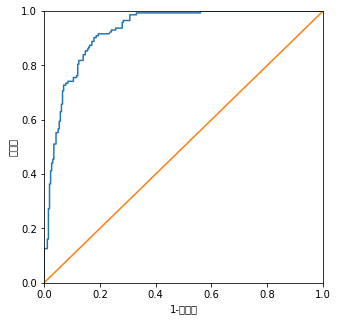

In [92]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label=1)
# false positive rate: fp/(fp+tn) => 1-fpr: tn/(fp+tn): 특이도
# true positive rate: tp/(tp+fn): 민감도

roc_df = pd.DataFrame({'민감도': tpr, '1-특이도': fpr})

fig, ax = plt.subplots(1,1,figsize=(5,5))
roc_df.plot(x='1-특이도', y='민감도', legend=False, ax=ax)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.plot((0,1),(0,1))
ax.set_xlabel('1-특이도')
ax.set_ylabel('민감도')

plt.show()

In [93]:
print(fpr[:5])
print(tpr[-5:])
print(threshold[:5])

[0.         0.         0.         0.01167315 0.01167315]
[1. 1. 1. 1. 1.]
[1.99795728 0.99795728 0.98070235 0.9762448  0.96858916]


In [94]:
#AUC는 ROC curve 밑에 면적을 계산하는거

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/var/folders/jy/qx6y98ss10nb55bjdvcnfbz40000gn/T/ipykernel_18012/129826890.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HA

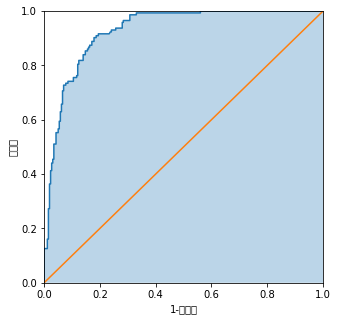

In [98]:
fpr, tpr, threshold = roc_curve(Y, logit_reg.predict_proba(Xs)[:, 1], pos_label=1)
# false positive rate: fp/(fp+tn) => 1-fpr: tn/(fp+tn): 특이도
# true positive rate: tp/(tp+fn): 민감도

roc_df = pd.DataFrame({'민감도': tpr, '1-특이도': fpr})

fig, ax = plt.subplots(1,1,figsize=(5,5))
roc_df.plot(x='1-특이도', y='민감도', legend=False, ax=ax)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.plot((0,1),(0,1))
ax.set_xlabel('1-특이도')
ax.set_ylabel('민감도')

ax.fill_between(roc_df['1-특이도'],0, roc_df['민감도'], alpha=0.3)

plt.show()

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [97]:
auc(fpr, tpr)

0.9274441511795597

In [99]:
roc_auc_score(Y, logit_reg.predict_proba(Xs)[:,1])

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9274441511795597

In [101]:
from sklearn.metrics import precision_recall_fscore_support

In [102]:
precision_recall_fscore_support(Y, logit_reg.predict(Xs), labels = logit_reg.classes_)

# 각 클래스(0,1)에 대한 정밀도, 재현율, f1score
#f1-score:2*precision*recall/(precision+recall)

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(array([0.85869565, 0.83870968]),
 array([0.92217899, 0.72727273]),
 array([0.88930582, 0.77902622]),
 array([257, 143]))

In [ ]:
#클래스가 여러개 일때 logisic regression

In [110]:
glasses = pd.read_csv('glass.txt', header=None)
glasses.columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
glasses

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [111]:
glasses['glass-type'].unique()

array([1, 2, 3, 5, 6, 7])

In [112]:
Xs=glasses[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]]
Y = glasses['glass-type']

In [118]:
glasses_reg=LogisticRegression(multi_class='multinomial', max_iter=300).fit(Xs,Y) #auto로 해도 알아서 자동으로 이진분류 멀티분류 구분해줌

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
glasses_reg.predict_proba(Xs)[0]

array([7.10395380e-01, 1.21219003e-01, 1.63035480e-01, 4.07259413e-04,
       4.61404991e-03, 3.28827236e-04])

In [123]:
precision_recall_fscore_support(Y,glasses_reg.predict(Xs), labels=glasses_reg.classes_)

/Users/jaunnnngspc/opt/anaconda3/envs/fakepython/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.62650602, 0.58139535, 0.        , 0.66666667, 0.57142857,
        0.89655172]),
 array([0.74285714, 0.65789474, 0.        , 0.46153846, 0.44444444,
        0.89655172]),
 array([0.67973856, 0.61728395, 0.        , 0.54545455, 0.5       ,
        0.89655172]),
 array([70, 76, 17, 13,  9, 29]))

In [126]:
glasses_reg.coef_

array([[-0.02846863, -0.73272546,  1.49743469, -1.95544404,  0.08836033,
        -0.23454483,  0.35144783,  0.04389071, -0.29832775],
       [ 0.05594303, -0.36941107,  0.45725027,  0.33387798,  0.01438137,
         0.60987267,  0.40507789,  0.29176827,  0.68004178],
       [ 0.00355214,  0.18872591,  1.15148123, -0.67259379, -0.10546204,
        -0.33692991,  0.34257822, -0.15500743,  0.00236816],
       [ 0.02330165, -0.7055326 , -0.78173557,  1.94850193,  0.07982358,
         0.97843933,  0.18041804, -0.11791852, -0.05725651],
       [-0.05058461,  1.17140069, -0.79268534, -0.22113382, -0.13149074,
        -1.28870933, -0.41901726, -1.04426576, -0.20004436],
       [-0.00374357,  0.44754253, -1.53174528,  0.56679173,  0.0543875 ,
         0.27187206, -0.86050472,  0.98153273, -0.12678131]])